<a href="https://colab.research.google.com/github/sabumjung/DL-test/blob/master/graph_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://mlabonne.github.io/blog/posts/2022_02_20_Graph_Convolution_Network.html
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 16.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch_geometric: filename=torch_geometric-2.3.1-py3-none-any.whl size=910454 sha256=ebe55bbde287d84c56b3bd3d7b74ad4c80c82a8244e9caae3a699f8da4f53eb3
  Stored in directory: /root/.cache/pip/wheels/ac/dc/30/e2874821ff308ee67dcd7a66dbde912411e19e35a1addda028
Successfully built torch_geometric


In [2]:
import torch
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
from torch_geometric.datasets import KarateClub

In [5]:
# 카라테클럽이라는 그래프 형태의 데이터셋을 가져옴
dataset=KarateClub()
print(dataset)
print('------------------')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

KarateClub()
------------------
Number of graphs: 1
Number of features: 34
Number of classes: 4


In [8]:
# x : node feature matrix를 말한다.(34개의 노드, 각 노드는 34차원의 피처벡터와 연관되어 있음)
# edge_index : 그래프 연결
# y : 각 노드는 한개의 클래스와 연결되어 있다
# train_mask : 옵션 속성, T/F의 값을 갖는다
print(f'Graph: {dataset[0]}')

Graph: Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


In [14]:
# data의 차원
# data.x의 값
data=dataset[0]
print(f'x={data.x.shape}')
print(data.x)
print(data.x[33])

x=torch.Size([34, 34])
tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])


In [16]:
# data.edge_index[0] : 시작노드(Ai)
# data.edge_index[1] : 종료노드(Aj)
print(f'edge_index={data.edge_index.shape}')
print(data.edge_index)
print(data.edge_index[1])

edge_index=torch.Size([2, 156])
tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
          3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
          7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 13,
         13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21,
         21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27,
         27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31,
         31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
         33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33],
        [ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 17, 19, 21, 31,  0,  2,
          3,  7, 13, 17, 19, 21, 30,  0,  1,  3,  7,  8,  9, 13, 27, 28, 32,  0,
          1,  2,  7, 12, 13,  0,  6, 10,  0,  6, 10, 16,  0,  4,  5, 16,  0,  1,
          2,  3,  0

In [18]:
from torch_geometric.utils import to_dense_adj
A=to_dense_adj(data.edge_index)[0].numpy().astype(int)
print(f'A={A.shape}')
print(A)
print(A[0])

A=(34, 34)
[[0 1 1 ... 1 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 1 1]
 [0 0 1 ... 1 0 1]
 [0 0 0 ... 1 1 0]]
[0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0]


In [19]:
# 4개의 class로 배정함(supervised learning)
# 예를들어 노드 0은 class 1에 해당함
print(f'y={data.y.shape}')
print(data.y)

y=torch.Size([34])
tensor([1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0,
        2, 2, 0, 0, 2, 0, 0, 2, 0, 0])


In [20]:
# train set으로 사용하고자 하는 데이터셋을 의미함
print(f'train_mask={data.train_mask.shape}')
print(data.train_mask)

train_mask=torch.Size([34])
tensor([ True, False, False, False,  True, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False, False,
        False, False, False, False])


In [21]:
# 그래프 데이터에 대한 특성
print(f'Edge are directed: {data.is_directed()}')
print(f'Graph has isolated nodes: {data.has_isolated_nodes()}')
print(f'Graph has loops: {data.has_self_loops()}')

Edge are directed: False
Graph has isolated nodes: False
Graph has loops: False


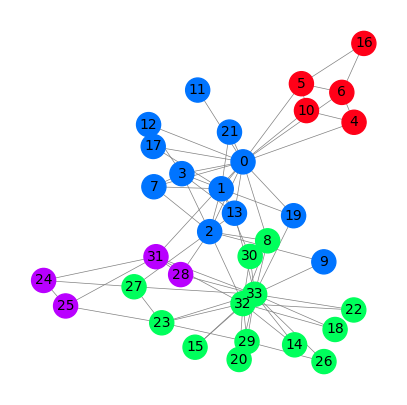

In [34]:
# 그래프 라이브러리 NetworkX를 사용하여 그래프 데이터를 다르게 표현해보도록 함
# 군집화하여 표현함(4개의 클래스를 대상으로)
# data.y에 설정한 class값에 근거한 색상 설정
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
plt.figure(figsize=(5,5))
plt.axis('off')
nx.draw_networkx(G,
                pos=nx.spring_layout(G, seed=0),
                with_labels=True,
                node_size=300,
                node_color=data.y,
                cmap="hsv",
                vmin=-2,
                vmax=3,
                width=0.5,
                edge_color="grey",
                font_size=10
                )
plt.show()

In [23]:
# 기초 GCN을 생성(1개의 GCN층 + ReLU 활성화함수 + 선형 출력층)
from torch.nn import Linear
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # 3차원 연산결과물 출력
        self.gcn = GCNConv(dataset.num_features, 3)
        # 3차원 입력받아 선형 출력층에 적용후 결과 출력
        self.out = Linear(3, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.gcn(x, edge_index).relu()
        z = self.out(h)
        return h, z

model = GCN()
print(model)

GCN(
  (gcn): GCNConv(34, 3)
  (out): Linear(in_features=3, out_features=4, bias=True)
)


In [24]:
# 손실함수 : 크로스엔트로피 사용
# 가중치 최적화 : Adam알고리즘 사용
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.02)

# 모델 성능 : 분류 정확도 Calculate accuracy
def accuracy(pred_y, y):
    return (pred_y == y).sum() / len(y)

# Data for animations
embeddings = []
losses = []
accuracies = []
outputs = []

# Training loop
for epoch in range(201):
    # Clear gradients
    optimizer.zero_grad()

    # Forward pass
    h, z = model(data.x, data.edge_index)

    # Calculate loss function
    loss = criterion(z, data.y)

    # Calculate accuracy
    acc = accuracy(z.argmax(dim=1), data.y)

    # Compute gradients
    loss.backward()

    # Tune parameters
    optimizer.step()

    # Store data for animations
    embeddings.append(h)
    losses.append(loss)
    accuracies.append(acc)
    outputs.append(z.argmax(dim=1))

    # Print metrics every 10 epochs
    if epoch % 10 == 0:
        print(f'Epoch {epoch:>3} | Loss: {loss:.2f} | Acc: {acc*100:.2f}%')

Epoch   0 | Loss: 1.30 | Acc: 41.18%
Epoch  10 | Loss: 1.15 | Acc: 61.76%
Epoch  20 | Loss: 0.94 | Acc: 70.59%
Epoch  30 | Loss: 0.67 | Acc: 73.53%
Epoch  40 | Loss: 0.45 | Acc: 88.24%
Epoch  50 | Loss: 0.31 | Acc: 97.06%
Epoch  60 | Loss: 0.21 | Acc: 100.00%
Epoch  70 | Loss: 0.15 | Acc: 100.00%
Epoch  80 | Loss: 0.11 | Acc: 100.00%
Epoch  90 | Loss: 0.08 | Acc: 100.00%
Epoch 100 | Loss: 0.07 | Acc: 100.00%
Epoch 110 | Loss: 0.05 | Acc: 100.00%
Epoch 120 | Loss: 0.04 | Acc: 100.00%
Epoch 130 | Loss: 0.04 | Acc: 100.00%
Epoch 140 | Loss: 0.03 | Acc: 100.00%
Epoch 150 | Loss: 0.03 | Acc: 100.00%
Epoch 160 | Loss: 0.02 | Acc: 100.00%
Epoch 170 | Loss: 0.02 | Acc: 100.00%
Epoch 180 | Loss: 0.02 | Acc: 100.00%
Epoch 190 | Loss: 0.02 | Acc: 100.00%
Epoch 200 | Loss: 0.02 | Acc: 100.00%


In [36]:
%%capture
from IPython.display import HTML
from matplotlib import animation
plt.rcParams["animation.bitrate"] = 3000

def animate(i):
    G = to_networkx(data, to_undirected=True)
    nx.draw_networkx(G,
                    pos=nx.spring_layout(G, seed=0),
                    with_labels=True,
                    node_size=300,
                    node_color=outputs[i],
                    cmap="hsv",
                    vmin=-2,
                    vmax=3,
                    width=0.8,
                    edge_color="grey",
                    font_size=14
                    )
    plt.title(f'Epoch {i} | Loss: {losses[i]:.2f} | Acc: {accuracies[i]*100:.2f}%',
              fontsize=12, pad=10)

fig = plt.figure(figsize=(12, 12))
plt.axis('off')

anim = animation.FuncAnimation(fig, animate, \
            np.arange(0, 200, 10), interval=500, repeat=True)
html = HTML(anim.to_html5_video())

In [26]:
display(html)

In [27]:
# Print embeddings
print(f'Final embeddings = {h.shape}')
print(h)

Final embeddings = torch.Size([34, 3])
tensor([[3.1008e+00, 0.0000e+00, 2.0272e+00],
        [2.2143e+00, 0.0000e+00, 2.5741e+00],
        [1.3669e+00, 0.0000e+00, 1.9590e+00],
        [2.3022e+00, 0.0000e+00, 2.2221e+00],
        [2.8240e+00, 4.5188e-01, 0.0000e+00],
        [3.1161e+00, 5.5644e-01, 0.0000e+00],
        [3.0729e+00, 5.8080e-01, 0.0000e+00],
        [1.9106e+00, 0.0000e+00, 1.7410e+00],
        [1.3269e-01, 1.6675e+00, 1.3654e+00],
        [1.4937e+00, 1.3431e-01, 1.5687e+00],
        [2.7683e+00, 4.6008e-01, 0.0000e+00],
        [1.8254e+00, 2.5609e-02, 1.7424e+00],
        [1.9053e+00, 3.0226e-04, 1.8463e+00],
        [1.6640e+00, 5.8101e-02, 1.7428e+00],
        [1.2768e-01, 1.9134e+00, 9.7134e-01],
        [1.6341e-01, 1.9958e+00, 9.6520e-01],
        [2.8324e+00, 7.3994e-01, 0.0000e+00],
        [1.8691e+00, 0.0000e+00, 1.7297e+00],
        [1.3384e-01, 1.8607e+00, 1.0786e+00],
        [1.5958e+00, 8.0934e-02, 1.6177e+00],
        [4.7881e-02, 1.8731e+00, 1.1293e+

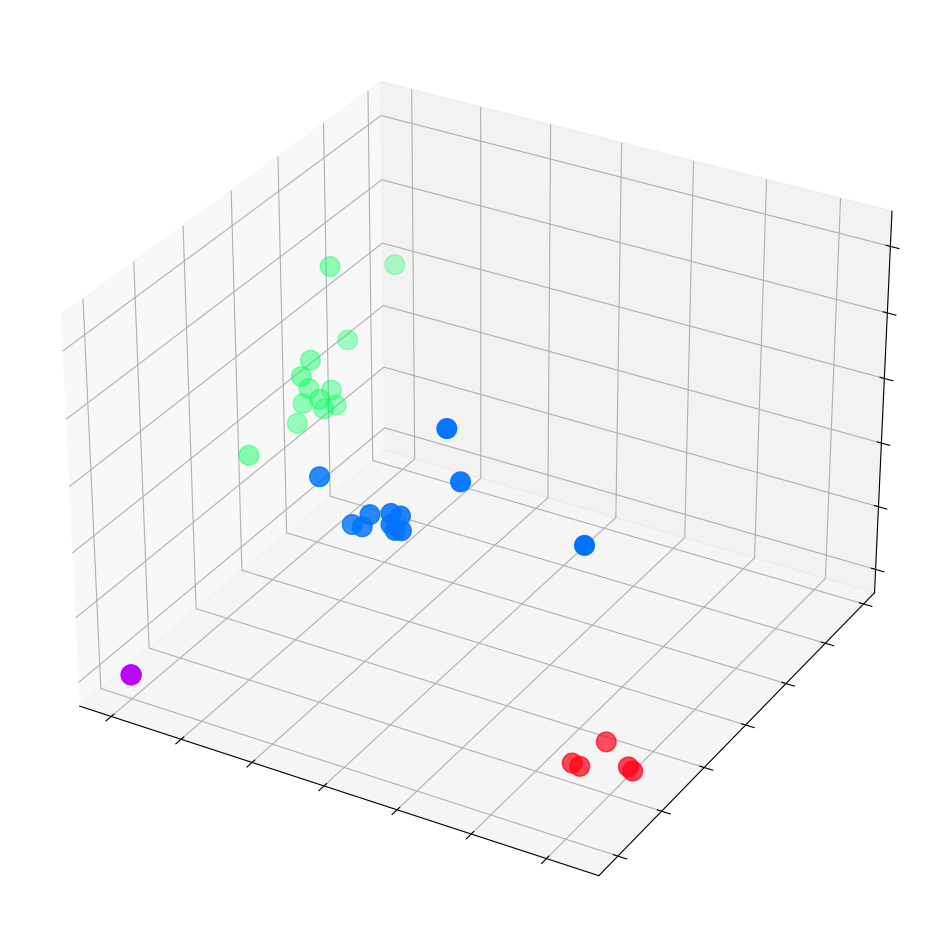

In [28]:
# Get first embedding at epoch = 0
embed = h.detach().cpu().numpy()

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.patch.set_alpha(0)
plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
ax.scatter(embed[:, 0], embed[:, 1], embed[:, 2],
           s=200, c=data.y, cmap="hsv", vmin=-2, vmax=3)

plt.show()

In [29]:
%%capture

def animate(i):
    embed = embeddings[i].detach().cpu().numpy()
    ax.clear()
    ax.scatter(embed[:, 0], embed[:, 1], embed[:, 2],
           s=200, c=data.y, cmap="hsv", vmin=-2, vmax=3)
    plt.title(f'Epoch {i} | Loss: {losses[i]:.2f} | Acc: {accuracies[i]*100:.2f}%',
              fontsize=18, pad=40)

fig = plt.figure(figsize=(12, 12))
plt.axis('off')
ax = fig.add_subplot(projection='3d')
plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)

anim = animation.FuncAnimation(fig, animate, \
              np.arange(0, 200, 10), interval=800, repeat=True)
html = HTML(anim.to_html5_video())

In [30]:
display(html)